# Part I WeRateDogs (Data Wrangling and Exploration)

## by (Joris Axel DA MATHA)

## Introduction
## 
> Hello Dear reader. 
The dataset that i will be wrangling (analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for me to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

![Weratedogs](https://video.udacity-data.com/topher/2017/October/59dd378f_dog-rates-social/dog-rates-social.jpg)

### Data Gathering

In cells below, i will gather **all** three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)
3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
#Import section
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_weratedogs_1 = pd.read_csv('./data_files/twitter-archive-enhanced.csv',sep=',')
df_weratedogs_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image_predictions.tsv',mode ='wb')as file:
    file.write(response.content)

In [8]:
df_weratedogs_2= pd.read_csv('./data_files/image_predictions.tsv',sep ='\t')
df_weratedogs_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
##################################################


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = "HIDDEN"
consumer_secret = "HIDDEN"
access_token = "HIDDEN"
access_secret = "HIDDEN"

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_weratedogs_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [11]:
def tweeter_json_reader(file):
    df_list=[]
    with open (file) as f:
        tweet_count = len(f.readlines())
    with open (file) as f:
        for i in range (tweet_count):
            content_str = f.readline()
            content_json = json.loads(content_str)
            df_list.append({'tweet_id':content_json['id'],
                            'retweet_count':content_json['retweet_count'],
                            'favorite_count':content_json['favorite_count']})
    df= pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count'])
    return df
df_weratedogs_3 =tweeter_json_reader('./data_files/tweet_json.txt')
df_weratedogs_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6966,33681
1,892177421306343426,5271,29215
2,891815181378084864,3464,21966
3,891689557279858688,7182,36738
4,891327558926688256,7710,35169


## Assessing Data
In this section, i will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 

* I only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* Due to image predictions for these tweets already prepared ,i do not need to gather the tweets beyond August 1st, 2017. 

The first dataset come from the `twitter-archive-enhanced.csv` file.

    We have the followings columns in this dataset:

| **`Columns`**        | **`Description`**  |  
| ------------- |-------------:|
| tweet_id   | ID of tweet performed |
| in_reply_to_status_id       |ID of response status to tweet     |
| in_reply_to_user_id | ID of user relying to tweet   |
| timestamp   | Time of tweet publishing |
| source      | URL of tweet  |
| text | Text of tweet      |
| retweeted_status_id   | Status id if that's a retweet |
| retweeted_status_user_id     | User id of retweet |
| retweeted_status_timestamp      | Indicate the time of retweet  |
| expanded_urls | URL expanded to access of tweet content   |
| rating_numerator   | Indicate rating by tweet users |
| rating_denominator      |Maximum of rating fixed   |
| name | Name of dog  |
| doggo, floofer,pupper,puppo   | Dog stages |

>First looks on data gathered (`Programatic assessment`)


In [12]:
df_weratedogs_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1369,702332542343577600,NaN,NaN,2016-02-24 03:21:41 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rudy. He's going to be a star. 13/10 t...,NaN,NaN,NaN,https://vine.co/v/irlDujgwOjd,13,10,Rudy,None,None,None,None
736,780931614150983680,NaN,NaN,2016-09-28 00:46:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to finally rate this iconic puppo who t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780931614...,13,10,None,None,None,None,puppo
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
481,815639385530101762,NaN,NaN,2017-01-01 19:22:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Titan. His nose is quite chilly. Reque...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815639385...,12,10,Titan,None,None,None,None


In [13]:
df_weratedogs_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
cols = list(df_weratedogs_1.columns)
types_df =[]
for i in cols:
    types_df.append({i:type(df_weratedogs_1[i][0])})
types_df

[{'tweet_id': numpy.int64},
 {'in_reply_to_status_id': numpy.float64},
 {'in_reply_to_user_id': numpy.float64},
 {'timestamp': str},
 {'source': str},
 {'text': str},
 {'retweeted_status_id': numpy.float64},
 {'retweeted_status_user_id': numpy.float64},
 {'retweeted_status_timestamp': float},
 {'expanded_urls': str},
 {'rating_numerator': numpy.int64},
 {'rating_denominator': numpy.int64},
 {'name': str},
 {'doggo': str},
 {'floofer': str},
 {'pupper': str},
 {'puppo': str}]

In [15]:
df_weratedogs_1.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Donny        1
Tyrus        1
Butters      1
Goliath      1
Lizzie       1
Name: name, Length: 957, dtype: int64

In [16]:
df_weratedogs_1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [17]:
df_weratedogs_1[df_weratedogs_1.rating_denominator == 0].text[313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [18]:
df_weratedogs_1.duplicated().sum()

0

In [19]:
df_weratedogs_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
df_weratedogs_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


>First dataset (`Visual assessment`)

We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
So we have to exclude the retweets from data.
![alt text](./images/Third_visual_assessement_df_weratedogs_1.PNG "Dataset visual assessment")
We have some errors in names especially some `a`. Sometimes people don't rate dogs but other animals. So we have to filter out these datas. 
    ![alt text](./images/First_visual_assessement_df_weratedogs_1.PNG "Dataset visual assessment")
>So we can filter out again the names : word after last `is`
                                       after , set the word after `named` , 
                                       if there is after some `a` , then we will replace them by NaN values
                                       
We have bad ratings, for example at row 1070, that possible to make a mistake and confuse a rate with a date. We should take the last fractions in each text.  
![alt text](./images/Second_visual_assessement_df_weratedogs_1.PNG "Dataset visual assessment")

But exception for of 344 ,that's definitively a date.  
![alt text](./images/Fourth_visual_assessement_df_weratedogs_1.PNG "Dataset visual assessment")

---

The second dataset come from the `image_predictions.tsv` file.

    We have the followings columns in this dataset:

| **`Columns`**        | **`Description`**  |  
| ------------- |-------------:|
| tweet_id  | ID of tweet performed |
| jpg_url       |URL of image gathered    |
| img_num | Number of image in tweet(*possible to have up to 4 image*)   |
| p1   |  #1 Algorithm's  prediction for the image in the tweet  |
| p1_conf      | How confident the algorithm is in its #1 prediction  |
| p1_dog | Whether or not the #1 prediction is a breed of dog     |
| p2   |  #2 Algorithm's  prediction for the image in the tweet  |
| p2_conf      | How confident the algorithm is in its #2 prediction  |
| p2_dog | Whether or not the #2 prediction is a breed of dog     |
| p3   |  #3 Algorithm's  prediction for the image in the tweet  |
| p3_conf      | How confident the algorithm is in its #3 prediction  |
| p3_dog | Whether or not the #3 prediction is a breed of dog     |

>First looks on data gathered (`Programatic assessement`)

In [23]:
df_weratedogs_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
294,671355857343524864,https://pbs.twimg.com/media/CVEilyCUwAETbJ-.jpg,1,miniature_poodle,0.313811,True,toy_poodle,0.165585,True,Irish_terrier,0.056094,True
554,677644091929329666,https://pbs.twimg.com/ext_tw_video_thumb/67764...,1,Chihuahua,0.626236,True,Italian_greyhound,0.128483,True,swing,0.059840,False
1531,789599242079838210,https://pbs.twimg.com/media/CvU4UZpXgAE1pAV.jpg,2,Chesapeake_Bay_retriever,0.878822,True,beagle,0.018570,True,Labrador_retriever,0.017499,True
1279,750117059602808832,https://pbs.twimg.com/media/Cmjzc-oWEAESFCm.jpg,2,Shih-Tzu,0.814405,True,Lhasa,0.175220,True,Pekinese,0.008072,True
1984,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True


In [24]:
df_weratedogs_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_weratedogs_2.duplicated().sum()

0

In [26]:
df_weratedogs_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


>Second dataset (`Visual assessment`)

We have to pay attention about the result of prediction algorithms, we can insure at least that if three predictions about the breed of dog return False, that means that we have not a dog inside image.
So we have to exclude tweets which not concern dogs rating.
    ![alt text](./images/Fist_visual_assessement_df_weratedogs_2.PNG "Dataset visual assessment")

***

The last dataset come from the `Tweeter gathering through API tweepy`.

   I selected just the retweets count and favorite count according to twwet_id.

| **`Columns`**        | **`Description`**  |  
| ------------- |-------------:|
| tweet_id  | ID of tweet performed |
| retweet_count      |Number of retweets   |
| favorite_count| Number of favorite count   |


>First looks on data gathered (`Programatic assessement`)
No need to proceed to visual assessment we should not encounter any ambiguity in this small dataset after return the the programatic assessment.


In [27]:
df_weratedogs_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6966,33681
1,892177421306343426,5271,29215
2,891815181378084864,3464,21966
3,891689557279858688,7182,36738
4,891327558926688256,7710,35169


In [29]:
df_weratedogs_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [31]:
df_weratedogs_3.duplicated().sum()

0

### Quality issues
1. We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
So we have to exclude the retweets rows from data.

2. Change the articles, and None in name column by `Unknown`.

3. Delete the row where we have only a date (344 on Excel) no rating value.

4. Align the numerators and denominators with the rate in text column.

5. Normalize denominators to 10.

6. Correct the dogs names.

7. Erroneous datatype(timestamp column).

8. Replace doggo,pupper,puppo,floofer none values by empty string.

9. We have to exclude tweets which not concern dogs rating in the image-prediction dataset.

### Tidiness issues
1. After rating normalization, we might delete the columns ratings_numerator and rating_denominator to conserve only a new column `rating`.

2. Combine the four columns doggo, pupper, puppo, and floofer in one column named `dog_stage`.
3. After removing of retweet, drop retweet_status_id,retweet_user_id,retweet_status_timestamp,doggo,pupper,puppo,floffer columns.
3. Drop the reply id columns , they are not informative.
4. Merge the three datasets based on tweet id.

## Cleaning Data
In this section, i'm gonna clean **all** of the issues you documented while assessing. 

In [32]:
# Make copies of original pieces of data
df1_clean = df_weratedogs_1.copy()
df2_clean = df_weratedogs_2.copy()
df3_clean = df_weratedogs_3.copy()

#### Issue N°1 :
>We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets. So we have to exclude the retweets rows from data.

##### Define :
Drop rows with retweet status and retweet used id not null from the first dataset. 

##### Code

In [33]:
retweets = df1_clean[df1_clean['retweeted_status_id'].isnull() == False].index.tolist()
df1_clean.drop(retweets,inplace =True)

##### Test

In [34]:
df1_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

#### Issue N°2 :
>Change the articles and none in name column by `Unknown`. That means the name is after another word like`named`instead of `is` or doesn't exist in text.

##### Define :
Replace in name column the article and `None` values by `Unknown`.
Link : https://towardsdatascience.com/check-for-a-substring-in-a-pandas-dataframe-column-4b949f64852

##### Code

In [35]:
print(df1_clean[df1_clean['name'].isin(['a','A','an','An,','the','The','no','None','none'])].name.value_counts())
df1_clean['name'].replace(to_replace= ['a','A','an','An,','the','The','no','None','none'],value='Unknown',inplace=True)

None    680
a        55
the       8
an        6
Name: name, dtype: int64


##### Test

In [36]:
print(df1_clean[df1_clean['name'].isin(['a','A','an','An,','the','The','no','None','none'])].name.value_counts())
df1_clean['name'].value_counts()

Series([], Name: name, dtype: int64)


Unknown     749
Lucy         11
Charlie      11
Oliver       10
Cooper       10
           ... 
Rizzy         1
Willie        1
Tonks         1
Cilantro      1
Lizzie        1
Name: name, Length: 953, dtype: int64

#### Issue N°3 :
> Delete the row where we have only a date (344 on Excel) no rating value

##### Define :
Drop the row with index 342 with id 832088576586297345

##### Code

In [37]:
print(df1_clean.loc[342]['text'])
df1_clean.drop(342,inplace=True)

@docmisterio account started on 11/15/15


##### Test

In [38]:
df1_clean[df1_clean['tweet_id'] == 832088576586297345]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue N°4 and N°5 :
>Align the numerators and denominators with the rate in text column and normalize all denominators as 10.

##### Define :
- Filter out the last fractions in text column
- Normalize the fractions which have a denominator superior to 10 after

##### Code

In [40]:
def cal_frac(text_content):
    '''Function cal_frac:
    Filter out the rating normalized with denominator fixed to 10
    I used re module to handle the text and '''
    res =re.findall('([\s,;.]?[0-9.]+/[0-9]+[\s.,]?)',text_content)[-1]
    a = float(re.findall('[\d]*[^\.]',re.findall('[\d.]+',res)[0])[0])
    b = int(re.findall('[\d]*[^\.,]',re.findall('[\d.]+',res)[1])[0])
    div= a/b
    if b !=10:
        numerator = int(round(div,1)*10)
    else:
        numerator =int(round(a,1)) 
    return numerator

df1_clean['rating'] = df1_clean['text'].apply(cal_frac)

##### Test

In [41]:
df1_clean[df1_clean['rating'] != df1_clean['rating_numerator']]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,13
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,Unknown,None,None,None,None,13
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,Unknown,None,None,None,None,13
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,Unknown,None,None,None,None,12
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None,34
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,9
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,11
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,Unknown,None,None,None,None,11
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,Unknown,None,None,None,None,11
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,None,None,None,None,7


In [42]:
df1_clean['text'][763] #Great that work fine we have a 11 as rating now

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

#### Issue N°6 :
>We have to correct dogs names
##### Define :
Replace 'Unknown' names by right names if included in text. Especially after `named`. 

##### Code

In [43]:
def find_name(text_content):
    ''' Function find_name to filter out dogs names after named'''
    name = re.findall('[a-zA-Z]*[^named ]',re.findall('named [a-zA-Z]*',text_content)[0])[0]
    return name
final_name=[]
index_names =[]
succ =[]
for i in range(df1_clean.shape[0]):
    try:
        final_name.append(find_name(df1_clean['text'][i]))
        succ.append(i)
    except Exception as e:
        #print(i,e)
        index_names.append(i)
df1_clean['name'].loc[succ] = final_name

C:\Users\SC00454\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


##### Test

In [44]:
print(df1_clean[['text','name']].loc[2128].text)
df1_clean.loc[succ]

This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639...,10,10,Wyli,None,None,None,None,10
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718...,10,10,Kip,None,None,None,None,10
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150...,11,10,Jacob,None,None,None,None,11
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085...,9,10,Rufus,None,None,None,None,9
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,Spork,None,None,None,None,9
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,Cherok,None,None,None,None,9
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,Hemry,None,None,None,None,9
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,Alphr,None,None,None,None,10
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,Alfredo,None,None,None,None,10
2166,669363888236994561,NaN,NaN,2015-11-25 03:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Gingivitis Pumpernickel named Z...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669363888...,10,10,Zeus,None,None,None,None,10


#### Issue N°7 :
> Erroneous datatype(timestamp column).

##### Define :
Change datatype timestamp to datetime type

##### Code

In [45]:
df1_clean['timestamp']=pd.to_datetime(df1_clean.timestamp)

##### Test

In [46]:
cols = list(df1_clean.columns)
types_df =[]
for i in cols:
    types_df.append({i:type(df1_clean[i][0])})
types_df

[{'tweet_id': numpy.int64},
 {'in_reply_to_status_id': numpy.float64},
 {'in_reply_to_user_id': numpy.float64},
 {'timestamp': pandas._libs.tslibs.timestamps.Timestamp},
 {'source': str},
 {'text': str},
 {'retweeted_status_id': numpy.float64},
 {'retweeted_status_user_id': numpy.float64},
 {'retweeted_status_timestamp': float},
 {'expanded_urls': str},
 {'rating_numerator': numpy.int64},
 {'rating_denominator': numpy.int64},
 {'name': str},
 {'doggo': str},
 {'floofer': str},
 {'pupper': str},
 {'puppo': str},
 {'rating': numpy.int64}]

#### Issue N°8 :
>Replace doggo,pupper,puppo,floofer None values by empty strings.

##### Define :
Replace doggo, pupper, puppo,floofer none by empty string. 

##### Code

In [47]:
df1_clean.doggo.replace({'None':''},inplace=True)
df1_clean.floofer.replace({'None':''},inplace=True)
df1_clean.pupper.replace({'None':''},inplace=True)
df1_clean.puppo.replace({'None':''},inplace=True)

##### Test

In [48]:
df1_clean.doggo.value_counts()

         2087
doggo      87
Name: doggo, dtype: int64

#### Issue N°9 :
>We have to exclude tweets which not concern dogs rating in the image-prediction dataset.

##### Define :
- Create a new column for second dataset for animal in tweet and if two algorithms confirm that's not a breed dog, we guess in the tweet there is no rate of dogs.
- Drop not dogs rows and after identity column

##### Code

In [50]:
# list of conditions
conditions = [
    ((df2_clean['p1_dog']==False) & (df2_clean['p2_dog'] == False)) | 
     ((df2_clean['p1_dog'] ==False) & (df2_clean['p3_dog'] == False)) |
     ((df2_clean['p2_dog'] == False) & (df2_clean['p3_dog'] == False))
    ]

# Persona class for each condition
values = ['Not_dog']

df2_clean['identity'] = np.select(conditions, values)

##### Test

In [51]:
print(df2_clean.shape)
df2_clean.drop(df2_clean[df2_clean.identity == 'Not_dog'].index,inplace = True)
df2_clean.drop(['identity'],axis = 1, inplace =True)
df2_clean.shape

(2075, 13)


(1590, 12)

#### Tidiness issues :


##### Define :
- Reset index the dataset
- Merge the stage columns in one column named dog_stage
- Drop ratings_numerator and rating_denominator, retweet_status_id,retweet_user_id,retweet_status_timestamp,reply columns,doggo,pupper,puppo,floofer
- Merge the three datasets based on the tweet-id

##### Code

In [52]:
df1_clean= df1_clean.reset_index(drop=True)

df1_clean['dog_stage'] = df1_clean.doggo + df1_clean.pupper + df1_clean.puppo + df1_clean.floofer
df1_clean[df1_clean['dog_stage'] == 'doggopupper']['dog_stage'] = 'doggo,pupper'
df1_clean[df1_clean['dog_stage'] == 'doggopuppo']['dog_stage'] = 'doggo,puppo'
df1_clean[df1_clean['dog_stage'] == 'doggofloofer']['dog_stage'] = 'doggo,floffer'
df1_clean.dog_stage.replace({'':None},inplace=True)

df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp','rating_numerator',
       'rating_denominator','doggo','pupper','puppo','floofer'], axis=1, inplace=True)

df1_clean = df1_clean.merge(df2_clean, on ='tweet_id',how ='inner')
final_twitter_data = df1_clean.merge(df3_clean, on ='tweet_id',how ='inner')

<ipython-input-52-39698168496a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean[df1_clean['dog_stage'] == 'doggopupper']['dog_stage'] = 'doggo,pupper'
<ipython-input-52-39698168496a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_clean[df1_clean['dog_stage'] == 'doggopuppo']['dog_stage'] = 'doggo,puppo'
<ipython-input-52-39698168496a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

##### Test

In [53]:
final_twitter_data.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5271,29215
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3464,21966
2,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7710,35169
3,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,Unknown,13,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2584,17738
4,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,13,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1646,10327


In [40]:
df.loc[4].p1

'Appenzeller'

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
final_twitter_data.to_csv('twitter_archive_master.csv',index = False)

***

### Data Exploration 
> Now let's discover the mysteries behind these data

#### Univariate Exploration

I'll start by looking at the distribution of the main variables of interest: `Rating`, `Favorite count`,`Retweet count`.

In [5]:
df = pd.read_csv('./twitter_archive_master.csv')

#### How is rating distribution?

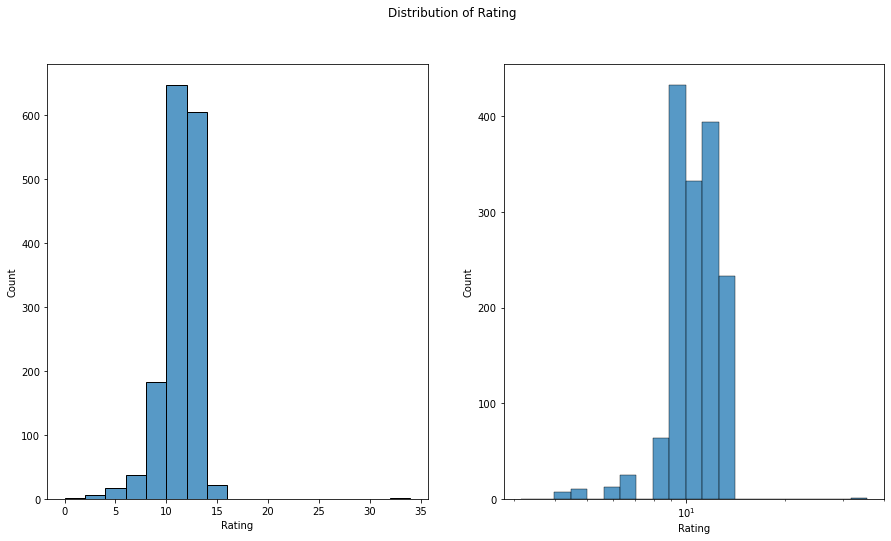

In [29]:
fig, ax =plt.subplots(ncols =2,figsize =[15,8])
binsize = 2
bins = np.arange(df['rating'].min(), df['rating'].max()+binsize, binsize) 
sb.histplot(data = df, x = 'rating',bins = bins,ax=ax[0])
#plt.xlim(xlimx,xlimy)
#plt.yticks(tick,tick_label)
ax[0].set_xlabel('Rating')
log_binsize = 0.05
bins = 10 ** np.arange(0.5, np.log10(df['rating'].max())+log_binsize, log_binsize)
sb.histplot(data = df, x = 'rating', bins = bins,ax=ax[1])
ax[1].set_xscale('log')
ax[1].set_xlabel('Rating')
plt.suptitle('Distribution of Rating')
plt.show()

The rating histogram is slightly skewed to the left. That means we have a lot people groups gave small ratings.

#### What is the relationship between dogs rating, favorite counts and retweet counts

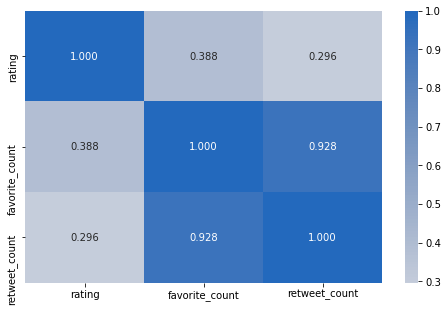

In [31]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[['rating','favorite_count','retweet_count']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

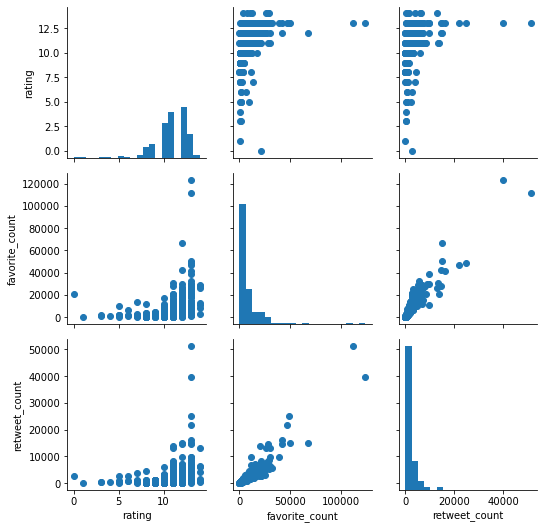

In [36]:
df_samp = df.sample(500)

g = sb.PairGrid(data = df_samp, vars = ['rating','favorite_count','retweet_count'])
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

The rating impacts a little the favorite count. This last grows expontentially when the rating increases. On another hand, the retweet count is proportional to favorite count.

In [41]:
numerical_vars =['rating','favorite_count','retweet_count']
categorical_vars =['dog_stage','p1','p2','p3']

#### Which dog stages have the most audience?

C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SC00454\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From versio

<Figure size 1152x720 with 0 Axes>

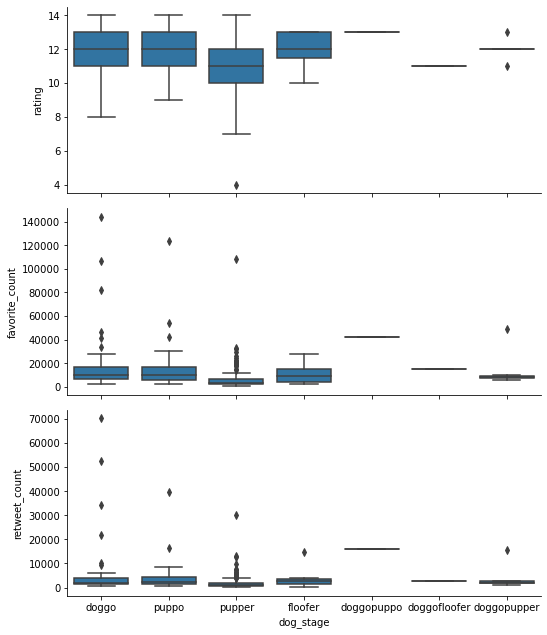

In [46]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    

plt.figure(figsize = [16, 10])
g = sb.PairGrid(data = df, y_vars = numerical_vars, x_vars = categorical_vars[0],
                size = 3, aspect = 2.5)
g.map(boxgrid)
plt.show()

We can see that doggo and puppo are more rated than other dog stages.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'doggo'),
  Text(1, 0, 'puppo'),
  Text(2, 0, 'pupper'),
  Text(3, 0, 'floofer'),
  Text(4, 0, 'doggopuppo'),
  Text(5, 0, 'doggofloofer'),
  Text(6, 0, 'doggopupper')])

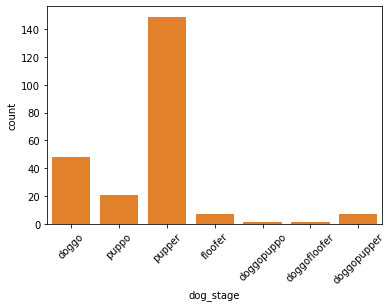

In [85]:
default_color = sb.color_palette()[1]
sb.countplot(data = df, x = 'dog_stage', color = default_color)
plt.xticks(rotation =45)

We have more pupper in dataset than other dog stages.

In [86]:
rating_breeds_counts = df.groupby(['rating','favorite_count','retweet_count'])['p1'].value_counts()
rating_breeds_counts.sort_index(ascending=False)

rating  favorite_count  retweet_count  p1              
34      5034            1323           golden_retriever    1
14      82356           34396          standard_poodle     1
        53791           16293          Rottweiler          1
        37006           5707           French_bulldog      1
        34496           12987          French_bulldog      1
                                                          ..
2       4981            2262           Maltese_dog         1
        1760            344            Border_collie       1
        347             100            seat_belt           1
1       226             61             Lakeland_terrier    1
0       20897           2754           swing               1
Name: p1, Length: 1521, dtype: int64

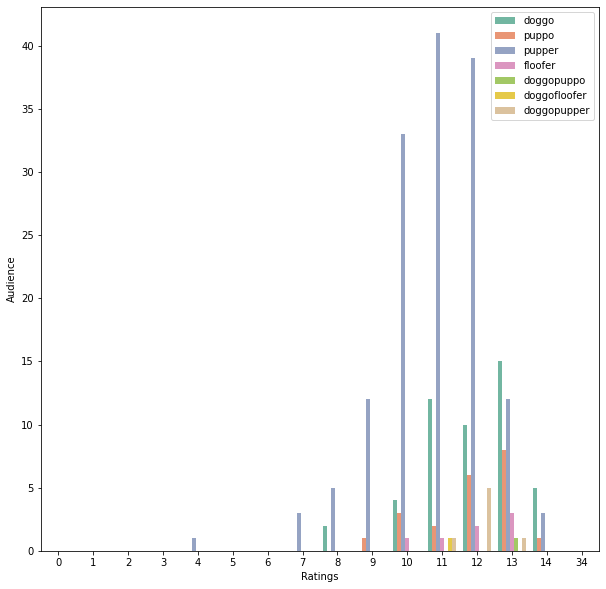

In [51]:
plt.figure(figsize = [10, 10])
sb.countplot(data = df, x = 'rating', hue = 'dog_stage', palette = "Set2")
plt.ylabel('Audience')
plt.xlabel('Ratings')
plt.legend(ncol = 1) # re-arrange legend to reduce overlapping

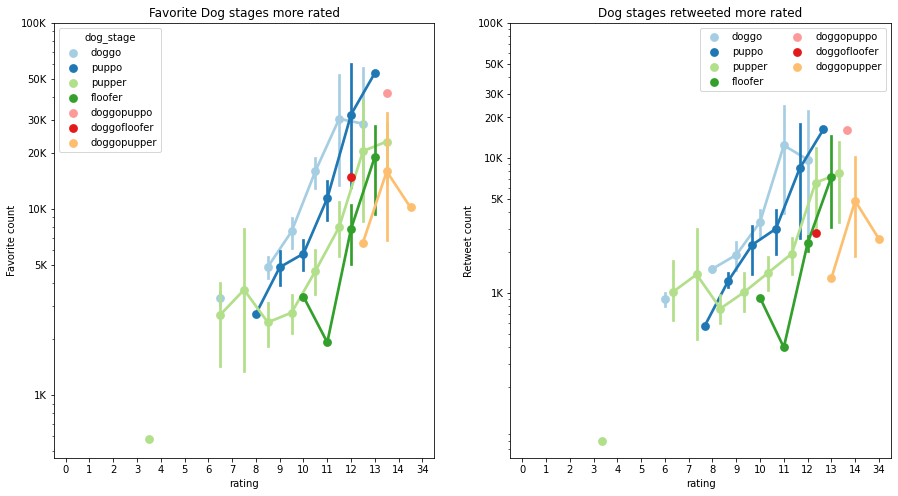

In [83]:
fig,ax =plt.subplots(ncols=2,figsize = [15,8] )
sb.pointplot(data = df, x = 'rating', y = 'favorite_count', hue = 'dog_stage',
           palette = 'Paired',linestyles='-',dodge = 3,errorbar=None, ax=ax[0])
ax[0].set_title('Favorite Dog stages more rated')
ax[0].set_ylabel('Favorite count')
ax[0].set_yscale('log')
ax[0].set_yticks([1000, 5000,10000, 20000, 30000, 50000,100000] )
ax[0].set_yticklabels(['1K', '5K','10K', '20K', '30K', '50K','100K'])
ax[0].set_yticklabels([],minor = True)
# re-arrange legend to reduce overlapping

sb.pointplot(data = df, x = 'rating', y = 'retweet_count', hue = 'dog_stage',
           palette = 'Paired',linestyles='-',dodge = 4,errorbar=None, ax=ax[1])
ax[1].set_title('Dog stages retweeted more rated')
ax[1].set_ylabel('Retweet count')
ax[1].set_yscale('log')
ax[1].set_yticks([1000, 5000,10000, 20000, 30000, 50000,100000] )
ax[1].set_yticklabels(['1K', '5K','10K', '20K', '30K', '50K','100K'])
ax[1].set_yticklabels([],minor = True)
plt.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show();

Inside data, we have a lot of pupper. Unfortunately puppers are underrated by audience and as expected their favorite and retweet counts are quite low. Contrary to doggo and puppo which have best results.